Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

1. Получите данные и загрузите их в рабочую среду.

In [ ]:
import pandas as pd
import numpy as np


from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
(housing_df.isna().mean() * 100).round(2)

MedInc         0.0
HouseAge       0.0
AveRooms       0.0
AveBedrms      0.0
Population     0.0
AveOccup       0.0
Latitude       0.0
Longitude      0.0
MedHouseVal    0.0
dtype: float64

В данных отсутствуют пропуски.

3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [ ]:
X = housing_df.drop(columns='MedHouseVal')
y = housing_df['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
r2_train1 = r2_score(y_train, y_pred_train)
r2_test1 = r2_score(y_test, y_pred_test)

In [ ]:
rmse_train1 = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test1 = mean_squared_error(y_test, y_pred_test, squared=False)

In [ ]:
print(f'R2 на тестовом множестве: {r2_test1}\nR2 на обучающем множестве: {r2_train1}')
print(f'RMSE на тестовом множестве: {rmse_test1}\nRMSE на обучающем множестве: {rmse_train1}')

R2 на тестовом множестве: 0.5757877060324508
R2 на обучающем множестве: 0.6125511913966952
RMSE на тестовом множестве: 0.7455813830127764
RMSE на обучающем множестве: 0.7196757085831575


Для удобства выполнения следующих пунктов организуем все эти действия в одну функцию

In [ ]:
def linear_model(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  r2_train = r2_score(y_train, y_pred_train)
  r2_test = r2_score(y_test, y_pred_test)
  rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
  rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
  return r2_train, r2_test, rmse_train, rmse_test

5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

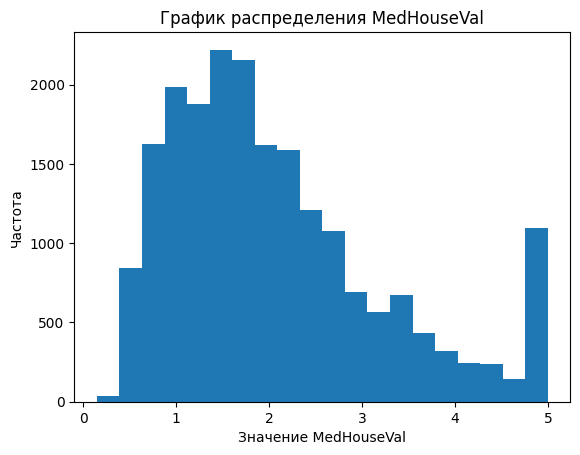

In [ ]:
plt.hist(housing_df['MedHouseVal'], bins = 20)
plt.xlabel('Значение MedHouseVal')
plt.ylabel('Частота')
plt.title('График распределения MedHouseVal')
plt.show()

На графике видно, что распределение не нормальное, центр значений сдвинут влево. Выбросами могут являться значения, находящиеся около 5, тк бОльшая часть данных распределена слева.

6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

a. Сделайте выводы.

b. Удалите признаки на основании полученных значений, выводов.

c. Повторите п. 3, п. 4 на измененных данных.

In [ ]:
corr = housing_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Для избежания переобучения модели между признаками не должно быть сильной корреляции. На корреляционной матрице видно, что корреляцию 0.85 имеют признаки AveRooms и AveBedrms (среднее кол-во комнат и спален), поэтому признак AveBedrms необходимо удалить. Также среднюю корреляцию имеет признак MedInc и целевая переменная MedHouseVal, но удаление столбца с данными о среднем доходе населения может негативно сказаться на точности модели, тк средний доход - важный фактор при определении стоимости жилья. Поэтому можно построить 2 модели с MedInc и без для того, чтобы проверить, какой вклад в точность вносит наличие этого признака.

In [ ]:
X_corr1 = housing_df.drop(columns=['MedHouseVal', 'AveBedrms'])
X_corr2 = housing_df.drop(columns=['MedHouseVal', 'AveBedrms', 'MedInc'])

In [ ]:
r2_train2, r2_test2, rmse_train2, rmse_test2 = linear_model(X_corr1, y)
print(f'R2 на тестовом множестве: {r2_test2}\nR2 на обучающем множестве: {r2_train2}')
print(f'RMSE на тестовом множестве: {rmse_test2}\nRMSE на обучающем множестве: {rmse_train2}')

R2 на тестовом множестве: 0.5823239094526445
R2 на обучающем множестве: 0.5995238502055928
RMSE на тестовом множестве: 0.7398151789804083
RMSE на обучающем множестве: 0.7316746485880744


Значение коэффициента R2 увеличилось и значение среднеквадратичной ошибки уменьшилось на тестовом множестве, что говорит о повышении (хоть и небольшом) точности модели, в то время как значения на обучающем множестве чуть ухудшились, что говорит об отсутствии переобучения модели.

In [ ]:
r2_train3, r2_test3, rmse_train3, rmse_test3 = linear_model(X_corr2, y)
print(f'R2 на тестовом множестве: {r2_test3}\nR2 на обучающем множестве: {r2_train3}')
print(f'RMSE на тестовом множестве: {rmse_test3}\nRMSE на обучающем множестве: {rmse_train3}')

R2 на тестовом множестве: 0.2988668599138865
R2 на обучающем множестве: 0.3138821758933589
RMSE на тестовом множестве: 0.9585255143766792
RMSE на обучающем множестве: 0.9576989913256296


Здесь представлены значения метрик при удалении признака со средним доходом. Они сильно ухудшились и поэтому можно сделать вывод о том, что удалять признак не нужно.

7. Исследуйте оставленные признаки на выбросы.

a. Удалите выбросы в случае обнаружения.

b. Повторите п. 3, п. 4 на измененных данных.

Для удобства напишем отдельную функцию для определения значений выбросов.

In [ ]:
def find_outliers(data, column_name):
  q1 = data[column_name].quantile(0.25)
  q3 = data[column_name].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
  outliers_value = data.loc[outliers.index, column_name].tolist() #запись в список значений выбросов
  return outliers_value

In [ ]:
for column_name in housing_df.columns:
  outliers_value = find_outliers(housing_df, column_name)
  print(f'Выбросов в столбце {column_name} {len(outliers_value)} штук: {outliers_value}')

Выбросов в столбце MedInc 681 штук: [8.3252, 8.3014, 11.6017, 8.2049, 8.401, 8.317, 8.1564, 8.8793, 8.8342, 10.0825, 9.3959, 11.8603, 13.499, 12.2138, 8.1872, 12.3804, 8.1194, 8.7477, 8.3996, 8.4045, 9.7194, 8.3337, 10.9506, 10.3203, 9.1531, 9.5862, 8.155, 8.3188, 9.7037, 10.3345, 12.5915, 15.0001, 9.8708, 8.2673, 8.4352, 10.7372, 13.4883, 9.5271, 12.2478, 8.0839, 9.0776, 8.039, 10.4549, 10.3224, 8.3678, 8.0448, 10.3713, 11.7064, 11.3421, 8.1586, 8.9571, 8.7589, 10.9405, 10.3416, 9.0064, 8.1489, 10.5815, 13.2949, 13.1499, 8.3209, 8.3956, 8.1163, 9.0243, 8.7059, 10.5144, 8.9669, 8.7716, 8.3608, 8.2737, 10.0263, 10.5941, 8.5325, 9.2873, 8.1248, 8.8467, 8.1125, 10.8805, 8.2159, 8.176, 10.9052, 8.203, 8.1356, 9.6047, 8.565, 8.1714, 8.7471, 8.8612, 8.6454, 8.3841, 11.2093, 8.4438, 9.6465, 8.3912, 10.9201, 8.4196, 10.5511, 8.7172, 13.4196, 10.3587, 10.6796, 11.2979, 12.8879, 9.2189, 10.2292, 10.4399, 10.0549, 8.2269, 10.3599, 8.8115, 8.153, 10.9237, 8.2954, 9.042, 8.0499, 8.5677, 10.5575, 12

Так как столбец с количеством спален по результатам корреляционного анализа не используется в построении модели, предварительно удалим его, для того, чтобы не потерять информацию, тк в этом столбце больше всего обнаружено выбросов.

In [ ]:
housing_no_outliers = housing_df.drop(columns=['AveBedrms'])

In [ ]:
for column_name in housing_no_outliers.columns:
  outliers_value = find_outliers(housing_no_outliers, column_name)
  if len(outliers_value) > 0:
    housing_no_outliers = housing_no_outliers[~housing_no_outliers[column_name].isin(outliers_value)] #оставляем строки без выбросов

In [ ]:
housing_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17168 entries, 3 to 20639
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       17168 non-null  float64
 1   HouseAge     17168 non-null  float64
 2   AveRooms     17168 non-null  float64
 3   Population   17168 non-null  float64
 4   AveOccup     17168 non-null  float64
 5   Latitude     17168 non-null  float64
 6   Longitude    17168 non-null  float64
 7   MedHouseVal  17168 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB


Строки с выбросами были удалены.

In [ ]:
y2 = housing_no_outliers['MedHouseVal']
X2 = housing_no_outliers.drop(columns=['MedHouseVal'])

In [ ]:
r2_train3, r2_test3, rmse_train3, rmse_test3 = linear_model(X2, y2)
print(f'R2 на тестовом множестве: {r2_test3}\nR2 на обучающем множестве: {r2_train3}')
print(f'RMSE на тестовом множестве: {rmse_test3}\nRMSE на обучающем множестве: {rmse_train3}')

R2 на тестовом множестве: 0.6178112928981232
R2 на обучающем множестве: 0.6274958929542234
RMSE на тестовом множестве: 0.5639823707351388
RMSE на обучающем множестве: 0.5739548626509028


После удаления выбросов значительно уменьшилось значение среднеквадратичной ошибки и на обучающей, и на тестовой выборке, значение R2 на тестовом множестве также увеличилось. Получается, что наличие выбросов значительно влияли на качество модели.

8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

a. Повторите п. 3, п. 4 на измененных данных.

Столбец MedInc со средними доходами можно прологарифмировать для сглаживания распределения, логарифмирование может сделать преобразование более симметричным и увеличить точность модели. Квадратный корень будем извлекать из данных в столбце Population и возведем в квадрат количество комнат.

In [ ]:
math_X2 = X2.copy()
math_X2['MedInc'] = np.log(math_X2['MedInc'])
math_X2['Population'] = np.sqrt(math_X2['Population'])
math_X2['AveRooms'] = math_X2['AveRooms'] ** 2
math_X2.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
3,1.730434,52.0,33.841580,23.622024,2.547945,37.85,-122.25
4,1.347086,52.0,39.461681,23.769729,2.181467,37.85,-122.25
5,1.395452,52.0,22.673387,20.322401,2.139896,37.85,-122.25
6,1.297217,52.0,24.323703,33.075671,2.128405,37.84,-122.25
7,1.137833,52.0,23.016266,34.014703,1.788253,37.84,-122.25


In [ ]:
r2_train4, r2_test4, rmse_train4, rmse_test4 = linear_model(math_X2, y2)
print(f'R2 на тестовом множестве: {r2_test4}\nR2 на обучающем множестве: {r2_train4}')
print(f'RMSE на тестовом множестве: {rmse_test4}\nRMSE на обучающем множестве: {rmse_train4}')

R2 на тестовом множестве: 0.5801895696341066
R2 на обучающем множестве: 0.5921511824338797
RMSE на тестовом множестве: 0.5910894608015936
RMSE на обучающем множестве: 0.6005674782501348


В результате проведения математических операций над столбцами уменьшились значения среднеквадратичных ошибок в сравнении с моделью без измененных признаков и немного увеличилось значение R2. Но значения метрик R2 и среднеквадратичных ошибок получили лучше на данных без выбросов и столбца с сильной корреляцией, чем на данных с математическими операциями

9. Сформулируйте выводы по проделанной работе.

a. Кратко опишите какие преобразования были сделаны с данными.

b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.

c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

Данные были проанализированы на наличие выбросов. Далее была построена модель на неизмененных данных, рассчитаны ее метрики. Затем, используя корреляционную матрицу, был удален столбец с наибольшей корреляцией, снова была построена модель и рассчитаны метрики. Следующим шагом были удалены все выбросы, построена модель и рассчитаны метрики. В завершение всего, над некоторыми столбцами были проведены математические операции, построена модель с учетом всех манипуляций и рассчитаны метрики качества модели.

In [ ]:
result = pd.DataFrame({'Модель': ['На необработанных данных', 'Без столбца AveBedrms', 'Без выбросов', 'С математическими операциями'],
                       'R2-test': [r2_test1, r2_test2, r2_test3, r2_test4],
                       'R2-train': [r2_train1, r2_train2, r2_train3, r2_train4],
                       'RMSE-test': [rmse_test1, rmse_test2, rmse_test3, rmse_test4],
                       'RMSE-train': [rmse_train1, rmse_train2, rmse_train3, rmse_train4]})
result

,Модель,R2-test,R2-train,RMSE-test,RMSE-train
0,На необработанных данных,0.575788,0.612551,0.745581,0.719676
1,Без столбца AveBedrms,0.582324,0.599524,0.739815,0.731675
2,Без выбросов,0.617811,0.627496,0.563982,0.573955
3,С математическими операциями,0.580190,0.592151,0.591089,0.600567


Лучшие значения метрик были получены при использовании данных без выбросов и без столбца AveBedrms